# Depression Speech Detection Pipeline

In [24]:
%%markdown
# Depression Speech Detection Pipeline - Data Preprocessing and Model Training with Synthetic Data

This notebook guides you through the process of loading pre-extracted features from real and synthetic speech data, training a logistic regression model, and evaluating its performance under different training data scenarios.

## Setup

To run this notebook, ensure you have Python installed. It is highly recommended to create a virtual environment to manage dependencies.

1.  **Google Drive Setup:** To access the data stored in your Google Drive, you need to mount it in this environment. Run the following code cell and follow the instructions to authorize access:
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```
    Once successfully mounted, your Google Drive contents will be accessible under the `/content/drive` directory.

2.  **Virtual Environment (Optional but Recommended):**
    ```bash
    python -m venv .venv
    ```

3.  **Activate the virtual environment:**
    *   On macOS and Linux:
        ```bash
        source .venv/bin/activate
        ```
    *   On Windows:
        ```bash
        .venv\Scripts\activate
        ```

4.  **Install required libraries:**
    Make sure you have the `requirements.txt` file generated in a previous step. Then run:
    ```bash
    pip install -r requirements.txt
    ```

## Data

For this notebook to run correctly, the data files must be organized in a specific directory structure within your Google Drive. The absolute paths used in the code cells expect the main project data directory to be located at `/content/drive/MyDrive/speech_depression/`.

Within this main directory, the following files and subdirectories are expected:

*   **Real audio features:**
    *   `X_train.npy`: Training features from real audio.
    *   `y_train.npy`: Training labels for real audio.
    *   `X_test.npy`: Testing features from real audio.
    *   `y_test.npy`: Testing labels for real audio.
    These `.npy` files should be placed directly in the `/content/drive/MyDrive/speech_depression/` directory.

*   **Synthetic audio files:**
    *   The raw `.wav` files generated by Coqui and Gemini TTS should be placed in specific subdirectories within `/content/drive/MyDrive/speech_depression/` based on their source and label (healthy/depressed).

The expected directory structure is as follows:

```
/content/drive/MyDrive/speech_depression/
├── healthy/
│   ├── transcriptions/
│   └── synthetic_audio_coqui/
│   └── synthetic_audio_gcloud_tts/
├── depressed/
│   ├── transcriptions/
│   └── synthetic_audio_coqui/
│   └── synthetic_audio_gcloud_tts/
├── X_train.npy
├── y_train.npy
├── X_test.npy
└── y_test.npy
```

Ensure that the synthetic audio files generated by the preceding notebooks are correctly located in the `synthetic_audio_coqui` and `synthetic_audio_gcloud_tts` subdirectories.

## Usage

Run each code cell in this notebook sequentially. The notebook will perform the following steps:

1.  Define functions for feature extraction (though these are primarily for reference as features are loaded).
2.  Load the pre-extracted features for real and synthetic audio.
3.  Define different training scenarios (real audio only, real + Coqui synthetic, real + Gemini synthetic).
4.  Train a Logistic Regression model for each scenario using the combined training data (where applicable).
5.  Evaluate the model's performance on the real audio test set.
6.  Print classification reports and display confusion matrices for each scenario.
7.  Generate a LaTeX table summarizing the performance metrics.

Pay attention to the output messages, which will indicate the progress and any potential issues (e.g., missing synthetic feature files).


# Depression Speech Detection Pipeline - Data Preprocessing and Model Training with Synthetic Data

This notebook guides you through the process of loading pre-extracted features from real and synthetic speech data, training a logistic regression model, and evaluating its performance under different training data scenarios.

## Setup

To run this notebook, ensure you have Python installed. It is highly recommended to create a virtual environment to manage dependencies.

1.  **Google Drive Setup:** To access the data stored in your Google Drive, you need to mount it in this environment. Run the following code cell and follow the instructions to authorize access:
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```
    Once successfully mounted, your Google Drive contents will be accessible under the `/content/drive` directory.

2.  **Virtual Environment (Optional but Recommended):**
    ```bash
    python -m venv .venv
    ```

3.  **Activate the virtual environment:**
    *   On macOS and Linux:
        ```bash
        source .venv/bin/activate
        ```
    *   On Windows:
        ```bash
        .venv\Scripts\activate
        ```

4.  **Install required libraries:**
    Make sure you have the `requirements.txt` file generated in a previous step. Then run:
    ```bash
    pip install -r requirements.txt
    ```

## Data

For this notebook to run correctly, the data files must be organized in a specific directory structure within your Google Drive. The absolute paths used in the code cells expect the main project data directory to be located at `/content/drive/MyDrive/speech_depression/`.

Within this main directory, the following files and subdirectories are expected:

*   **Real audio features:**
    *   `X_train.npy`: Training features from real audio.
    *   `y_train.npy`: Training labels for real audio.
    *   `X_test.npy`: Testing features from real audio.
    *   `y_test.npy`: Testing labels for real audio.
    These `.npy` files should be placed directly in the `/content/drive/MyDrive/speech_depression/` directory.

*   **Synthetic audio files:**
    *   The raw `.wav` files generated by Coqui and Gemini TTS should be placed in specific subdirectories within `/content/drive/MyDrive/speech_depression/` based on their source and label (healthy/depressed).

The expected directory structure is as follows:

```
/content/drive/MyDrive/speech_depression/
├── healthy/
│   ├── transcriptions/
│   └── synthetic_audio_coqui/
│   └── synthetic_audio_gcloud_tts/
├── depressed/
│   ├── transcriptions/
│   └── synthetic_audio_coqui/
│   └── synthetic_audio_gcloud_tts/
├── X_train.npy
├── y_train.npy
├── X_test.npy
└── y_test.npy
```

Ensure that the synthetic audio files generated by the preceding notebooks are correctly located in the `synthetic_audio_coqui` and `synthetic_audio_gcloud_tts` subdirectories.

## Usage

Run each code cell in this notebook sequentially. The notebook will perform the following steps:

1.  Define functions for feature extraction (though these are primarily for reference as features are loaded).
2.  Load the pre-extracted features for real and synthetic audio.
3.  Define different training scenarios (real audio only, real + Coqui synthetic, real + Gemini synthetic).
4.  Train a Logistic Regression model for each scenario using the combined training data (where applicable).
5.  Evaluate the model's performance on the real audio test set.
6.  Print classification reports and display confusion matrices for each scenario.
7.  Generate a LaTeX table summarizing the performance metrics.

Pay attention to the output messages, which will indicate the progress and any potential issues (e.g., missing synthetic feature files).


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
import numpy as np

# Define the base path for your data in Google Drive
drive_base_path = "/content/drive/MyDrive/speech_depression/"

# Define the paths for the healthy and depressed real audio folders
healthy_audio_folder = os.path.join(drive_base_path, "healthy")
depressed_audio_folder = os.path.join(drive_base_path, "depressed")

# Initialize lists to store file paths and labels
all_file_paths = []
all_labels = []

# Iterate through the healthy real audio folder
if os.path.exists(healthy_audio_folder):
    print(f"Processing healthy audio files from: {healthy_audio_folder}")
    for fname in os.listdir(healthy_audio_folder):
        if fname.endswith(".wav"):
            file_path = os.path.join(healthy_audio_folder, fname)
            all_file_paths.append(file_path)
            all_labels.append(0) # 0 for healthy
else:
    print(f"Healthy audio folder not found: {healthy_audio_folder}")


# Iterate through the depressed real audio folder
if os.path.exists(depressed_audio_folder):
    print(f"Processing depressed audio files from: {depressed_audio_folder}")
    for fname in os.listdir(depressed_audio_folder):
        if fname.endswith(".wav"):
            file_path = os.path.join(depressed_audio_folder, fname)
            all_file_paths.append(file_path)
            all_labels.append(1) # 1 for depressed
else:
    print(f"Depressed audio folder not found: {depressed_audio_folder}")

# Convert lists to NumPy arrays
all_file_paths = np.array(all_file_paths)
all_labels = np.array(all_labels)

print(f"Found {len(all_file_paths)} real audio files.")

Processing healthy audio files from: /content/drive/MyDrive/speech_depression/healthy
Processing depressed audio files from: /content/drive/MyDrive/speech_depression/depressed
Found 43 real audio files.


In [27]:
import librosa
import numpy as np

def extract_mel_spectrogram(file_path, n_mels=128, time_steps=128):
    """Extracts mel spectrogram features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_db = librosa.power_to_db(S, ref=np.max)
    # Pad/crop to fixed size
    if S_db.shape[1] < time_steps:
        S_db = np.pad(S_db, ((0,0),(0,time_steps-S_db.shape[1])), mode='constant')
    else:
        S_db = S_db[:, :time_steps]
    return S_db.flatten() # Ensure features are flattened

all_features = []

# Check if all_file_paths is empty before iterating
if len(all_file_paths) > 0:
    for file_path in all_file_paths:
        try:
            feat = extract_mel_spectrogram(file_path)
            all_features.append(feat)
        except Exception as e:
            print(f"Skipping {file_path}: {e}")
else:
    print("No audio files found to extract features from.")

all_features = np.array(all_features)

print(f"Shape of extracted features: {all_features.shape}")

Shape of extracted features: (43, 16384)


In [28]:
from sklearn.model_selection import train_test_split

if len(all_features) > 0 and len(all_labels) > 0:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42, stratify=all_labels)
    print("Data split into training and testing sets.")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
else:
    print("Cannot split data: Features or labels are empty.")
    # Initialize empty arrays if splitting is not possible
    X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])

Data split into training and testing sets.
X_train shape: (34, 16384)
y_train shape: (34,)
X_test shape: (9, 16384)
y_test shape: (9,)


In [29]:
# Define the base path for saving the files in Google Drive
drive_base_path = "/content/drive/MyDrive/speech_depression/"

# Check if the training data arrays are not empty
if X_train.shape[0] > 0 and y_train.shape[0] > 0 and X_test.shape[0] > 0 and y_test.shape[0] > 0:
    # Save the arrays as .npy files
    np.save(os.path.join(drive_base_path, "X_train.npy"), X_train)
    np.save(os.path.join(drive_base_path, "y_train.npy"), y_train)
    np.save(os.path.join(drive_base_path, "X_test.npy"), X_test)
    np.save(os.path.join(drive_base_path, "y_test.npy"), y_test)

    print("Training and testing feature files saved to Google Drive.")
else:
    print("Training or testing data is empty. Skipping saving process.")

Training and testing feature files saved to Google Drive.


In [30]:
import os
import numpy as np
import librosa

def extract_mel_spectrogram(file_path, n_mels=128, time_steps=128):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_db = librosa.power_to_db(S, ref=np.max)
    # Pad/crop to fixed size
    if S_db.shape[1] < time_steps:
        S_db = np.pad(S_db, ((0,0),(0,time_steps-S_db.shape[1])), mode='constant')
    else:
        S_db = S_db[:, :time_steps]
    return S_db

def extract_synthetic_features_coqui(folders):
    features, labels, names = [], [], []
    for folder in folders:
        coqui_synthetic_audio_folder = folder["synthetic_audio_folder"]
        if not os.path.exists(coqui_synthetic_audio_folder):
            continue
        for fname in os.listdir(coqui_synthetic_audio_folder):
            if fname.endswith("_coqui.wav"):
                file_path = os.path.join(coqui_synthetic_audio_folder, fname)
                try:
                    feat = extract_mel_spectrogram(file_path)
                    features.append(feat.flatten())
                    labels.append(0 if folder["label"] == "healthy" else 1)
                    names.append(os.path.splitext(fname)[0])
                except Exception as e:
                    print(f"Skipping {fname}: {e}")
    return np.array(features), np.array(labels), names

coqui_folders = [
    {
        "label": "healthy",
        "transcription_folder": os.path.join("/content/drive/MyDrive/speech_depression/healthy", "transcriptions"),
        "synthetic_audio_folder": os.path.join("/content/drive/MyDrive/speech_depression/healthy", "synthetic_audio_coqui")
    },
    {
        "label": "depressed",
        "transcription_folder": os.path.join("/content/drive/MyDrive/speech_depression/depressed", "transcriptions"),
        "synthetic_audio_folder": os.path.join("/content/drive/MyDrive/speech_depression/depressed", "synthetic_audio_coqui")
    }
]

X_coqui, y_coqui, coqui_filenames = extract_synthetic_features_coqui(coqui_folders)

np.save("X_coqui.npy", X_coqui)
np.save("y_coqui.npy", y_coqui)

print(f"Extracted features from {len(X_coqui)} Coqui synthetic audio files.")

Extracted features from 14 Coqui synthetic audio files.


In [31]:
import os
import numpy as np
import librosa

# Reuse the existing extract_mel_spectrogram function
def extract_mel_spectrogram(file_path, n_mels=128, time_steps=128):
    """Extracts mel spectrogram features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_db = librosa.power_to_db(S, ref=np.max)
    # Pad/crop to fixed size
    if S_db.shape[1] < time_steps:
        S_db = np.pad(S_db, ((0,0),(0,time_steps-S_db.shape[1])), mode='constant')
    else:
        S_db = S_db[:, :time_steps]
    return S_db

def extract_synthetic_features_gemini(folders):
    """Extracts mel spectrogram features from Gemini synthetic audio files."""
    features, labels, names = [], [], []
    for folder in folders:
        gemini_synthetic_audio_folder = folder["synthetic_audio_folder"]
        if not os.path.exists(gemini_synthetic_audio_folder):
            print(f"Synthetic audio folder not found: {gemini_synthetic_audio_folder}. Skipping feature extraction for this folder.")
            continue

        for fname in os.listdir(gemini_synthetic_audio_folder):
            # Ensure we only process files generated by Gemini
            # Assuming files generated by Gemini have a specific suffix, e.g., "_gcloud_tts.wav"
            if fname.endswith("_gcloud_tts.wav"):
                file_path = os.path.join(gemini_synthetic_audio_folder, fname)
                try:
                    feat = extract_mel_spectrogram(file_path)
                    features.append(feat.flatten())
                    labels.append(0 if folder["label"] == "healthy" else 1)
                    names.append(os.path.splitext(fname)[0])
                except Exception as e:
                    print(f"Skipping {fname}: {e}")
    return np.array(features), np.array(labels), names

# Define folders for Gemini synthetic audio output
gemini_folders = [
    {
        "label": "healthy",
        "transcription_folder": os.path.join("/content/drive/MyDrive/speech_depression/healthy", "transcriptions"),
        "synthetic_audio_folder": os.path.join("/content/drive/MyDrive/speech_depression/healthy", "synthetic_audio_gcloud_tts")
    },
    {
        "label": "depressed",
        "transcription_folder": os.path.join("/content/drive/MyDrive/speech_depression/depressed", "transcriptions"),
        "synthetic_audio_folder": os.path.join("/content/drive/MyDrive/speech_depression/depressed", "synthetic_audio_gcloud_tts")
    }
]

# Call the function and save the results
X_gemini, y_gemini, gemini_filenames = extract_synthetic_features_gemini(gemini_folders)

with open("gemini_filenames.txt", "w") as f:
    for name in gemini_filenames:
        f.write(name + "\n")

np.save("X_gemini.npy", X_gemini)
np.save("y_gemini.npy", y_gemini)

print(f"Extracted features from {len(X_gemini)} Gemini synthetic audio files.")

Extracted features from 43 Gemini synthetic audio files.


Successfully loaded real audio features.
Successfully loaded Coqui synthetic features.
Successfully loaded Gemini synthetic features.
=== Model Performance Under Different Training Conditions ===

Real audio only
Accuracy: 0.89
F1-score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



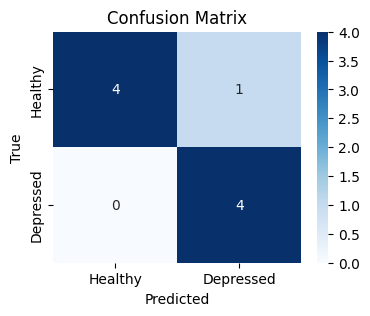


Real + Coqui synthetic
Accuracy: 0.67
F1-score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9



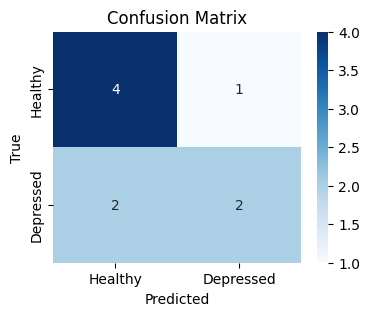


Real + Gemini synthetic
Accuracy: 0.67
F1-score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9



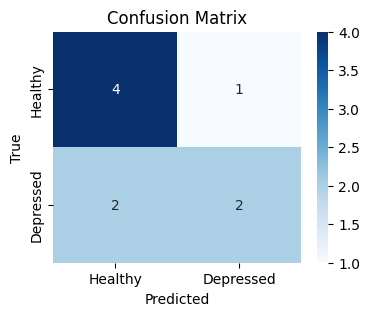

In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the base path for your data in Google Drive
drive_base_path = "/content/drive/MyDrive/speech_depression/"

# Load real audio features
try:
    X_real = np.load(os.path.join(drive_base_path, "X_train.npy"), allow_pickle=True)
    y_real = np.load(os.path.join(drive_base_path, "y_train.npy"), allow_pickle=True)
    X_test_real = np.load(os.path.join(drive_base_path, "X_test.npy"), allow_pickle=True)
    y_test_real = np.load(os.path.join(drive_base_path, "y_test.npy"), allow_pickle=True)
    print("Successfully loaded real audio features.")
except FileNotFoundError as e:
    print(f"Error loading real audio features: {e}")
    print(f"Please ensure the files X_train.npy, y_train.npy, X_test.npy, and y_test.npy are located in: {drive_base_path}")
    # Exit or handle the error as appropriate, e.g., by setting X_real and y_real to empty arrays
    X_real, y_real, X_test_real, y_test_real = np.array([]), np.array([]), np.array([]), np.array([])


# Load Coqui synthetic features (handle potential absence of files)
try:
    X_coqui = np.load("X_coqui.npy", allow_pickle=True)
    y_coqui = np.load("y_coqui.npy", allow_pickle=True)
    print("Successfully loaded Coqui synthetic features.")
except FileNotFoundError:
    print("Coqui synthetic feature files not found. Skipping Coqui synthetic scenario.")
    X_coqui = np.array([])
    y_coqui = np.array([])

# Load Gemini synthetic features (handle potential absence of files)
try:
    X_gemini = np.load("X_gemini.npy", allow_pickle=True)
    y_gemini = np.load("y_gemini.npy", allow_pickle=True) # Corrected typo here
    print("Successfully loaded Gemini synthetic features.")
except FileNotFoundError:
    print("Gemini synthetic feature files not found. Skipping Gemini synthetic scenario.")
    X_gemini = np.array([])
    y_gemini = np.array([])


scenarios = [
    ("Real audio only", X_real, y_real),
]

if X_coqui.shape[0] > 0 and X_real.shape[0] > 0:
    # Ensure both arrays are 2D before concatenating
    X_coqui_2d = X_coqui.reshape(X_coqui.shape[0], -1) if X_coqui.ndim == 1 else X_coqui
    X_real_2d = X_real.reshape(X_real.shape[0], -1) if X_real.ndim == 1 else X_real
    if X_coqui_2d.shape[1] == X_real_2d.shape[1]:
        scenarios.append(("Real + Coqui synthetic", np.concatenate([X_real_2d, X_coqui_2d]), np.concatenate([y_real, y_coqui])))
    else:
        print(f"Skipping Coqui synthetic scenario: Feature dimension mismatch between real ({X_real_2d.shape[1]}) and Coqui ({X_coqui_2d.shape[1]}) features.")
elif X_coqui.shape[0] == 0:
    print("Skipping Coqui synthetic scenario: No Coqui synthetic features found.")
elif X_real.shape[0] == 0:
     print("Skipping Coqui synthetic scenario: No real features found.")


if X_gemini.shape[0] > 0 and X_real.shape[0] > 0:
    # Ensure both arrays are 2D before concatenating
    X_gemini_2d = X_gemini.reshape(X_gemini.shape[0], -1) if X_gemini.ndim == 1 else X_gemini
    X_real_2d = X_real.reshape(X_real.shape[0], -1) if X_real.ndim == 1 else X_real
    if X_gemini_2d.shape[1] == X_real_2d.shape[1]:
        scenarios.append(("Real + Gemini synthetic", np.concatenate([X_real_2d, X_gemini_2d]), np.concatenate([y_real, y_gemini])))
    else:
         print(f"Skipping Gemini synthetic scenario: Feature dimension mismatch between real ({X_real_2d.shape[1]}) and Gemini ({X_gemini_2d.shape[1]}) features.")
elif X_gemini.shape[0] == 0:
    print("Skipping Gemini synthetic scenario: No Gemini synthetic features found.")
elif X_real.shape[0] == 0:
     print("Skipping Gemini synthetic scenario: No real features found.")


results = []

print("=== Model Performance Under Different Training Conditions ===")
for label, X_train, y_train in scenarios:
    if len(np.unique(y_train)) < 2:
        print(f"\n{label} - Skipped: Only one class present in training data.")
        # Append placeholder results for skipped scenarios to maintain table structure
        results.append({"Scenario": label, "Accuracy": float('nan'), "F1-score": float('nan')})
        continue
    if X_train.shape[0] == 0:
        print(f"\n{label} - Skipped: Training data is empty.")
        results.append({"Scenario": label, "Accuracy": float('nan'), "F1-score": float('nan')})
        continue


    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_real)
    acc = accuracy_score(y_test_real, y_pred)
    f1 = f1_score(y_test_real, y_pred, average="weighted")

    print(f"\n{label}")
    print(f"Accuracy: {acc:.2f}\nF1-score: {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test_real, y_pred, digits=2))

    cm = confusion_matrix(y_test_real, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Depressed"], yticklabels=["Healthy", "Depressed"])
    plt.title(f"Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    results.append({"Scenario": label, "Accuracy": acc, "F1-score": f1})